<a href="https://colab.research.google.com/github/MarianaObandoGutierrez/Programacion-Aplicada-GM/blob/main/Taller_AlgLin_Repr0_ANN_001_2020_04_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universidad Distrital F. J. C.
## Facultad De Ingeniería
### Algebra Lineal
#### Gerardo Muñoz
gmunoz@udistrital.edu.co

In [ ]:
nombre='Eblinn Mariana Obando Gutierrez'

In [ ]:
codigo=20192005009    # Remplace con su código


* La variable `a` será el **último** digito de su código.
* La variable `b` será el **penúltimo** digito de su código.

# Redes Neuronales Artificiales

Con el fin de introducir los temas del curso, en esta sección explicaremos el fundamento de una Red Neuronal Artificial (ANN).

## Neurona Artificial Lineal


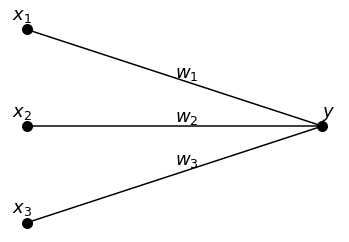

In [ ]:
# Ignorar este código
# Este código se usa para imprimir una neurona de tres entradas
import matplotlib.pyplot as plt#.plot
fig,ax=plt.subplots()

puntos=[[0,0,0,1],  # x1 x2 x3 x4
        [1,2,3,2]]  # y1 y2 y3 y4
ax.scatter(*puntos,s=100,color='k')

lineas=[(0,1),(1,2),'k', #(x1,x4),(y1,y4),color
        (0,1),(2,2),'k', #(x2,x4),(y2,y4),color
        (0,1),(3,2),'k', #(x2,x4),(y3,y4),color
       ]
ax.plot(*lineas)

ax.text(-0.05, 1.1, r'$x_3$',{'fontsize': 18})
ax.text(-0.05, 2.1, r'$x_2$',{'fontsize': 18})
ax.text(-0.05, 3.1, r'$x_1$',{'fontsize': 18})
ax.text(0.5, 1.6, r'$w_3$',{'fontsize': 18})
ax.text(0.5, 2.05, r'$w_2$',{'fontsize': 18})
ax.text(0.5, 2.5, r'$w_1$',{'fontsize': 18})
ax.text(1, 2.1, r'$y$',{'fontsize': 18})

ax.axis('off')
plt.show()

Donde $w_1 x_1 + w_2 x_2 + \cdots + w_n x_n = y$


**Una neurona artificial** consiste en:
* un conjunto de **entradas**
$\vec{x}=\left(\matrix{x_1 \\ x_2 \\ \vdots \\ x_n}\right)$
* un conjunto de **pesos** $\vec{w}=\left(\matrix{w_1 \\ w_2 \\ \vdots \\ w_n}\right)$
* una **función** $f$,  para este curso será la función identidad. (Usualmente la función es no lineal, pero este no es el caso).

En este caso la salida de la neurona artificial lineal está dada por la siguiente operación vectorial conocida como producto punto.


$y=\vec{w} \cdot \vec{x}$

<!--Gráficamente se visualiza de la siguiente forma-->


#### Ejercicio #1
De acuerdo con su código, calcule los vectores

$\vec{x}=\left(\matrix{a-3 \\ a+1 \\ a-1 }\right)$, $\vec{w}=\left(\matrix{b+2 \\ b-1 \\ b}\right)$

y finalmente calcule manualmente el valor de $y=\vec{w} \cdot \vec{x}$.



In [6]:
# Respuesta #1
#x=(6,10,8)
#w=(2,-1,0)
y = 6*2 + 10*-1 + 8*0
y                     # Colocar un número

2

#### Ejercicio #2

Con el mismo valor de
$\vec{x}=\left(\matrix{a-3 \\ a+1 \\ a-1 }\right)$,
descubra, con ensayo y error, un vector  $\vec{w}$, sin ceros, tal que $y=10$.



In [4]:
# Respuesta #2
w=(-3, 5, 4)                   # Colocar una tupla
x=(6, 10, 8)
y= w[0]*x[0]+w[1]*x[1]+w[2]*x[2]
y

64

## Capa Lineal Densa

Una **capa lineal densa** consiste en un conjunto de neuronas artificiales que sólo comparten el vector de entradas

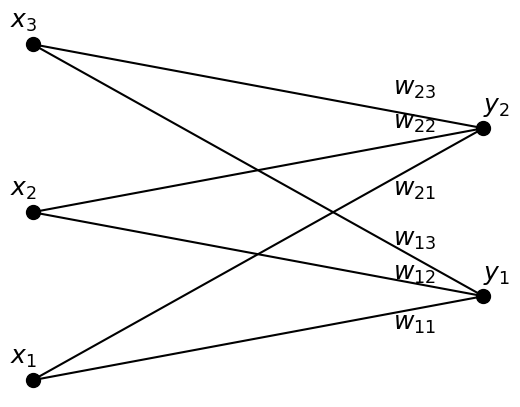

In [25]:
# Ignorar este código
# Este código es para dibujar una capa de 3 entradas, 2 salidas.
import matplotlib.pyplot as plt#.plot
fig,ax=plt.subplots()
lineas=[(0,1),(1,1.5),'k',
        (0,1),(2,1.5),'k',
        (0,1),(3,1.5),'k',
        (0,1),(1,2.5),'k',
        (0,1),(2,2.5),'k',
        (0,1),(3,2.5),'k',
       ]
ax.plot(*lineas)
puntos=[[0,0,0,1,1],
        [1,2,3,1.5,2.5]]
ax.scatter(*puntos,s=100,color='k')
ax.text(-0.05, 1.1, r'$x_1$',{'fontsize': 18})
ax.text(-0.05, 2.1, r'$x_2$',{'fontsize': 18})
ax.text(-0.05, 3.1, r'$x_3$',{'fontsize': 18})
ax.text(0.8, 2.1, r'$w_{21}$',{'fontsize': 18})
ax.text(0.8, 2.5, r'$w_{22}$',{'fontsize': 18})
ax.text(0.8, 2.7, r'$w_{23}$',{'fontsize': 18})
ax.text(0.8, 1.3, r'$w_{11}$',{'fontsize': 18})
ax.text(0.8, 1.6, r'$w_{12}$',{'fontsize': 18})
ax.text(0.8, 1.8, r'$w_{13}$',{'fontsize': 18})
ax.text(1, 1.6, r'$y_1$',{'fontsize': 18})
ax.text(1, 2.6, r'$y_2$',{'fontsize': 18})
ax.axis('off')
plt.show()

En este caso las ecuaciones quedan

$y_1 = w_{11} x_1 + w_{12} x_2 + \cdots + w_{1n} x_n $

$y_2 = w_{21} x_1 + w_{22} x_2 + \cdots + w_{2n} x_n $  

$\vdots$

$y_m = w_{m1} x_1 + w_{m2} x_2 + \cdots + w_{mn} x_n $


#### Ejemplo
Suponga que tiene una red neuronal de 3 entradas y 2 salidas con los siguientes pesos:

$w_{11}=0.3, w_{12}=1, w_{13}=0, w_{21}=0.8, w_{22}=0.3, w_{23}=0.5$

Si el vector de entradas es $\vec{x}=\left(\matrix{0.7, 0.3, 0.5}\right)$ calcule el vector de salidas.

In [18]:
(x1, x2, x3) = (0.7, 0.3, 0.5)

(w11, w12, w13) = (0.3, 1.0, 0.0)
(w21, w22, w23) = (0.8, 0.3, 0.5)

y1 = w11*x1 + w12*x2 + w13*x3
y2 = w21*x1 + w22*x2 + w23*x3

(y1, y2)

(0.51, 0.8999999999999999)

#### Ejercicio #3
Con el mismo valor de los pesos calcule, manualmente o con python, el vector de salidas
sabiendo que el vector de entrada es
$\vec{x}=\left(\matrix{ \frac{a}{10} \\ \frac{b}{10} \\ \frac{a+b}{20} }\right)$. Recuerde que $a$ y $b$ dependen de su código.

In [19]:
# Respuesta #3
w=(2,-1,0)                   # Tupla w respuesta 1
x=(0.9, 0, (9/20))           #Tupla x reemplazando
y= w[0]*x[0]+w[1]*x[1]+w[2]*x[2]
y

1.8

#### Cálculo de la salida
La  rutina `calcula_salida` calcula un vector de salida dado un vector de entrada y la rutina `calcula_salidas` calcula varios vectores de salida, uno por cada uno de los vectores de entrada que recibe.  

In [20]:
def calcula_salida(x,w):
    """ Calcula el vector de salida de la neurona lineal. Lista de flotantes.

    Parameters
    ----------
    x : vector de entrada. Lista de flotantes.
    w : pesos de la capa. Lista de listas de flotantes.
    """
    y=[]                          # inicializa el vector de salida vacío
    for i in range(len(w)):       # para cada una de las salidas:
        yi=0                        # inicializa la sumatoria en cero
        for j in range(len(x)):     # para cada una de las entradas:
            yi=yi+w[i][j]*x[j]        # y_i = ... + w_ij * x_j
        y.append(yi)                # almacena cada salida en el vector de salida
    return y                      # retorna el vector de salida

# Se calcula la salida del ejemplo anterior usando la rutina
x=[x1, x2, x3]
w=[[w11, w12, w13], [w21, w22, w23]]
calcula_salida(x,w)

[0.51, 0.8999999999999999]

In [21]:
# De este código sólo hay que tener en cuenta el comentario bajo la definición.
def calcula_salidas(xs,w):
    """ Calcula varios vectores de salida de las neuronas lineales. Lista de listas de flotantes.

    Parameters
    ----------
    xs : lista de vectores de entrada. Lista de listas de flotantes.
    w : pesos de la capa. Lista de listas de flotantes.
    """
    ys=[]
    for x in xs:
        y=calcula_salida(x,w)
        ys.append(y)
    return ys

# Se calcula la salida de dos vectores usando la rutina
xs=[[x1, x2, x3], [0.3, 0.6, 0.8]]
y_calc=calcula_salidas(xs, w)
y_calc

[[0.51, 0.8999999999999999], [0.69, 0.8200000000000001]]

Observe que como la entrada tenía dos vectores, la salida también tienen dos vectores. El primer vector de salida corresponde al primer vector de entrada.


## Ejemplo de las sombra de un cubo
Usaremos una capa lineal en donde:
* El vector $\vec{x}$ de entrada es de tamaño 3 y representa un punto en flotando sobre el piso. (por ejemplo una pluma)
* El vector $\vec{y}$ de salida es de tamaño 2 y representa la sombra del punto en el piso.

Para entrenar la capa lineal se usará la sombra de los siguientes 8 puntos de un cubo:

In [22]:
#       x1  x2    x3
cubo=[[0.5, 0.5, 0.5],
      [0.5, 0.5, 1.0],
      [0.5, 1.0, 0.5],
      [0.5, 1.0, 1.0],
      [1.0, 0.5, 0.5],
      [1.0, 0.5, 1.0],
      [1.0, 1.0, 0.5],
      [1.0, 1.0, 1.0]]

Las coordenadas de la sombra son:

In [23]:
#         y1       y2
sombra=[[0.5263, 0.5263], #d=10
        [0.5555, 0.5555],
        [0.5263, 1.0526],
        [0.5555, 1.1111],
        [1.0526, 0.5263],
        [1.1111, 0.5555],
        [1.0526, 1.0526],
        [1.1111, 1.1111]]

La siguiente rutina permite dibujar la sombra.

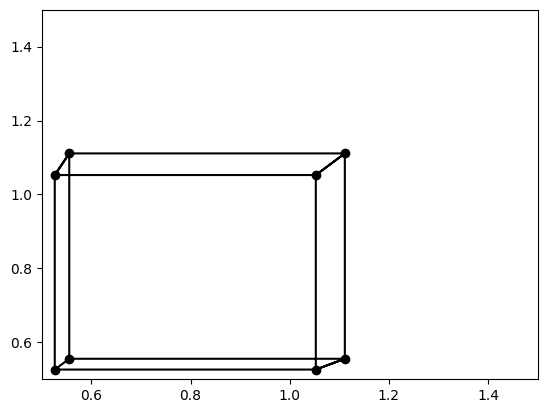

In [26]:
# De este código sólo hay que tener en cuenta el comentario bajo la definición.
import numpy as np
def dibuja(sombra,xmin=0.5,xmax=1.5,ymin=0.5,ymax=1.5):
    """
    Se define una rutina para dibujar los puntos de la sombra y los arcos

    Parameters
    ----------
    sombra : Lista de puntos de la sombra. Lista de listas de flotantes.
    """
    p=np.array(sombra)
    plt.scatter(*p.T,color='black')
    p1=[sombra[0],sombra[2],
        sombra[6],sombra[4],
        sombra[0],sombra[1],
        sombra[3],sombra[2],sombra[3],
        sombra[7],sombra[6],sombra[7],
        sombra[5],sombra[4],sombra[5],
        sombra[1]]
    p1=np.array(p1)
    l1=p1.transpose()
    plt.plot(*l1,color='black')
    plt.axis([xmin,xmax,ymin,ymax])
    return plt.show()

# Se dibuja la sombra
dibuja(sombra)

A continuación calculamos la salida de la capa lineal cuando entran los puntos del cubo. Y después se dibujan esos puntos calculados.

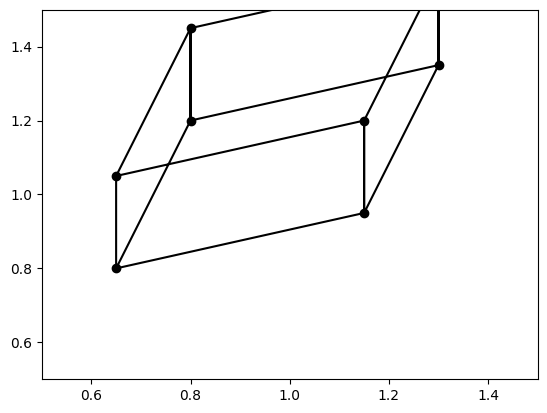

[[0.65, 0.8],
 [0.65, 1.05],
 [1.15, 0.95],
 [1.15, 1.2],
 [0.8, 1.2000000000000002],
 [0.8, 1.4500000000000002],
 [1.3, 1.35],
 [1.3, 1.6]]

In [27]:
y_calc=calcula_salidas(cubo,w)
dibuja(y_calc)
y_calc

Es muy notoria la diferencia entre los puntos de la sombra y los puntos calculados con la capa lineal. Pero es necesario cuantificar esta diferencia.

### Error cuadrático medio.

Antes de modificar los pesos es necesario medir que tan alejada está la salida calculada $\vec{y'}$ de la salida esperada $\vec{y}$. Para esto usaremos el **error cuadrático medio** (MSE), el cual está dado por la siguiente fórmula:

$\text{MSE}(\vec{y_j'},\vec{y_J'})=\frac{1}{n}\sum_{i=1}^n(y'_i-y_i)^2$

El error cuadrático medio de $m$ parejas de vectores $(\vec{y_j'},\vec{y_j})$ es:

$\frac{1}{nm}\sum_{i=1}^n\sum_{i=1}^m(y'_{ij}-y_{ij})^2$


In [28]:
# De este código sólo hay que tener en cuenta el comentario bajo la definición.

def calcula_error(y_a,y_b):
    """
    Calcula el error cuadrático medio

    Parameters
    ----------
    x : lista de vectores de entradas. Lista de listas de flotantes.
    w : pesos de la red. Lista de lista de flotantes.
    y : lista de vectores de salida. Lista de listas de flotantes.
    """
    error=0
    m=len(y_a)
    n=len(y_a[0])
    for j in range(m):
        yaj=y_a[j]
        ybj=y_b[j]
        for i in range(n):
            error=error+(yaj[i]-ybj[i])**2
    return error/(n*m)

error=calcula_error(sombra,y_calc)
print('El error de la salida calculada es',error)

El error de la salida calculada es 0.18396797750000005


#### Ejercicio #4
1. Encuentre mediante ensayo y error un valor de `w` (por ejemplo
`w=[[0.6, 0.3, 0.5], [0.7, 0.5, 0.6]]`) pero que genere un error menor que `0.183`.

2. Calcule el respectivo error.

3. Genere la gráfica de los datos generados.


In [49]:
# Respuesta #4.1
w=[[0.6, 0.2, 0.5], [0.4, 0.5, 0.6]]
w

[[0.6, 0.2, 0.5], [0.4, 0.5, 0.6]]

In [50]:
# Respuesta #4.2
y_calc=calcula_salidas(cubo,w)
y_calc



[[0.65, 0.75],
 [0.9, 1.05],
 [0.75, 1.0],
 [1.0, 1.2999999999999998],
 [0.95, 0.95],
 [1.2, 1.25],
 [1.05, 1.2],
 [1.3, 1.5]]

In [51]:
error=calcula_error(sombra,y_calc)
print('El error de la salida calculada es',error)

El error de la salida calculada es 0.1002229775


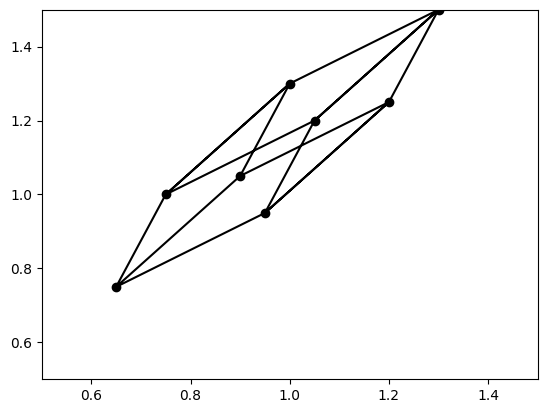

In [52]:
# Respuesta #4.3
dibuja(y_calc)


### Retropropagación
Recordemos que la derivada de una función permite determinar cómo aumenta la función en un determinado punto. Si seguimos paso a paso la dirección en que disminuye la función, podemos acercarnos a un mínimo local.

Al derivar el error respecto al peso $w_{ij}$ se obtiene $-x_j(y'_i-y_i)$. De esta forma es posible calcular un nuevo peso que disminuye el error.

$w'_{ij}=w_{ij}+\eta x_j(y'_i-y_i)$

Donde $\eta$ determina el tamaño del paso que se da.

Este algoritmo se llama de **retropropagación** porque se aplica a multiples capas empezando desde las capas de salida hacia las capas de entrada.


In [53]:
import copy
def backprop_lin(x,w_ant,y_esp,y_calc,va=0.1):
    """ Recalcula los pesos de la capa lineal

    Parameters
    ----------
    x : vector de entradas. Lista de flotantes.
    w : pesos de la red. Lista de lista de flotantes.
    ye : vector de salida esperado. Lista de flotantes.
    yc : vector de salida calculado. Lista de flotantes.
    va=0.1 : velocidad de aprendizaje. Flotante.
    """
    #yc=calcula_salida(x,w_ant)
    w_sig=copy.deepcopy(w_ant) # copia los pesos
    for i in range(len(w_sig)): # para cada una de las salidas
        for j in range(len(w_sig[0])): # para cada una de las entradas
            #print('w_sig,va,x,y_esp,y_calc',w_sig,va,x,y_esp,y_calc)
            w_sig[i][j]=w_sig[i][j]+va*x[j]*(y_esp[i]-y_calc[i]) # se calcula el nuevo peso i,j
    return w_sig # retorna los nuevos pesos

x=cubo[0]
ye=sombra[0]
#calcula_error(y_calc,sombra)
yc=calcula_salida(x,w)
w_calc=backprop_lin(x,w,ye,yc,1)
w_calc,calcula_error(calcula_salidas(cubo,w_calc),sombra)


([[0.5381499999999999, 0.13815, 0.43815], [0.28815, 0.38815, 0.48815]],
 0.038592675)

El **entrenamiento** consiste en aplicar el anterior algoritmo con todo el conjunto de datos. Si el error aún es muy grande entonces es necesario repetir este proceso. Las **épocas** es el número de veces que se repite todo el conjunto de datos.

Epoca: 0 error: 0.18396797750000005


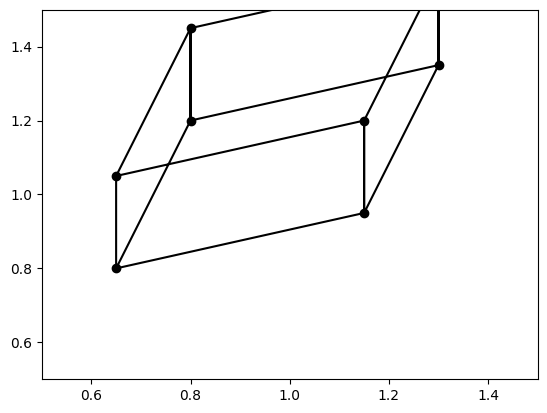

Epoca: 1 error: 0.05981447393357957


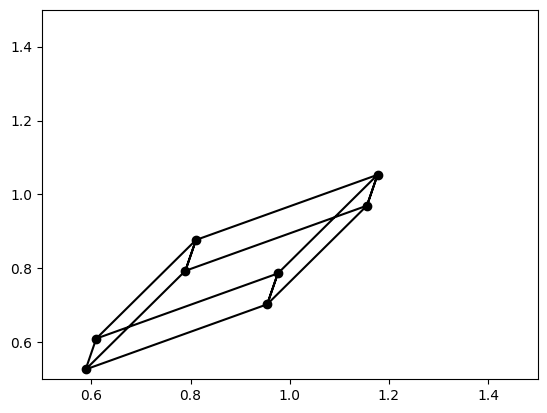

Epoca: 2 error: 0.036729941759601974


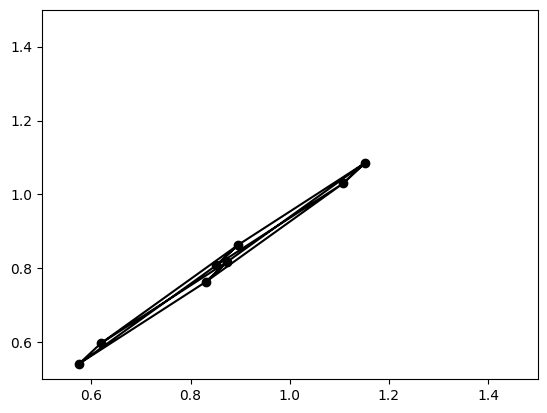

Epoca: 3 error: 0.023166040585458306


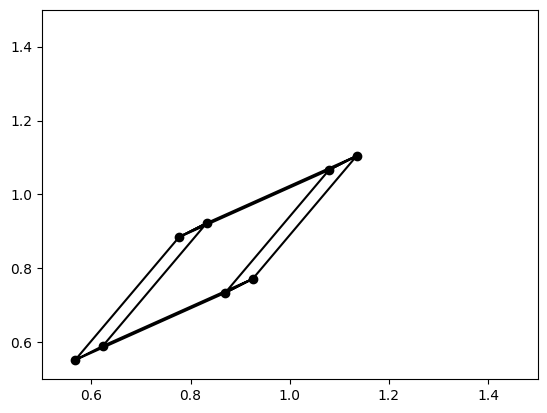

Epoca: 4 error: 0.01496580985480134


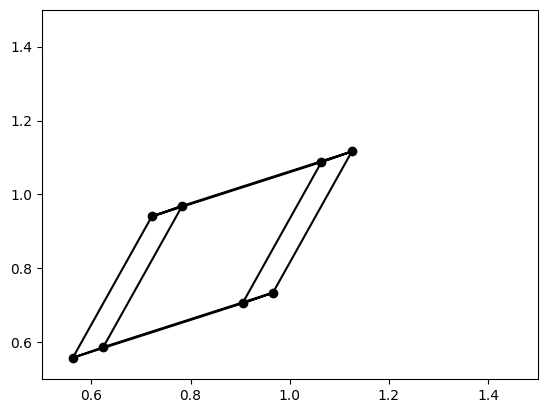

Epoca: 5 error: 0.009895374334138491


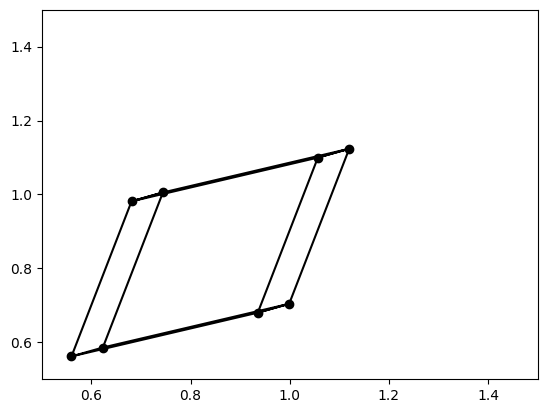

Epoca: 6 error: 0.006708407944255233


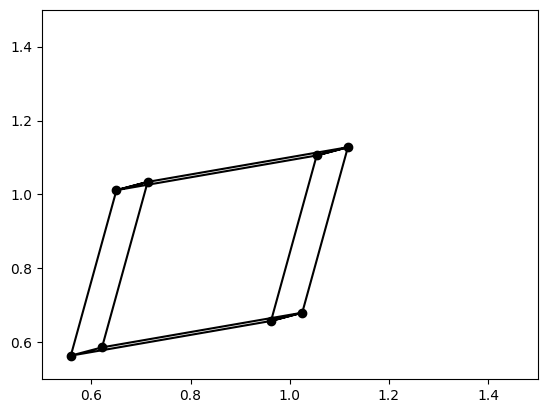

Epoca: 7 error: 0.004683530842301001


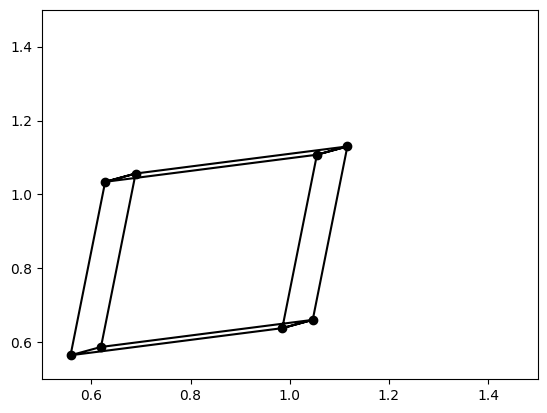

Epoca: 8 error: 0.003389193513614815


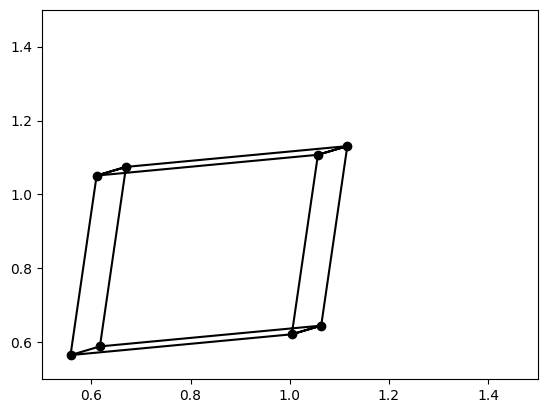

Epoca: 9 error: 0.002560081952221325


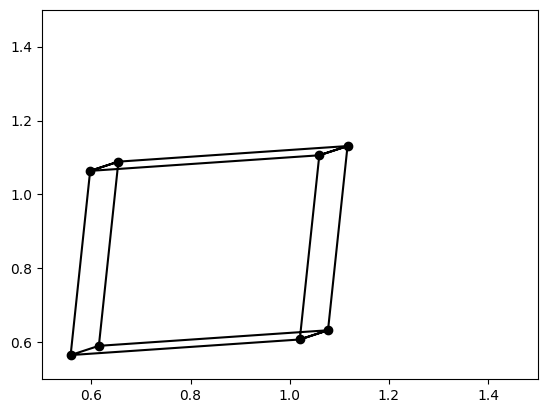

Epoca: 10 error: 0.002029630225071338


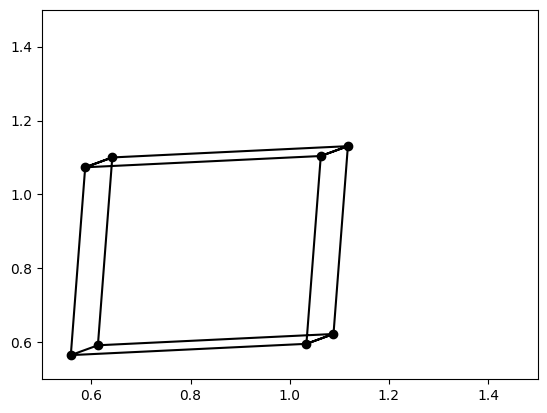

Epoca: 11 error: 0.0016916958196807799


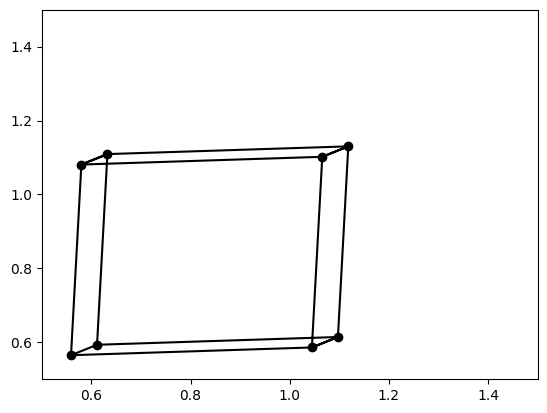

Epoca: 12 error: 0.0014779760721268594


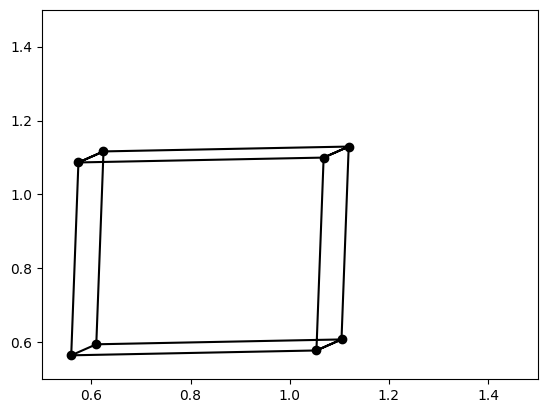

Epoca: 13 error: 0.0013442683470611028


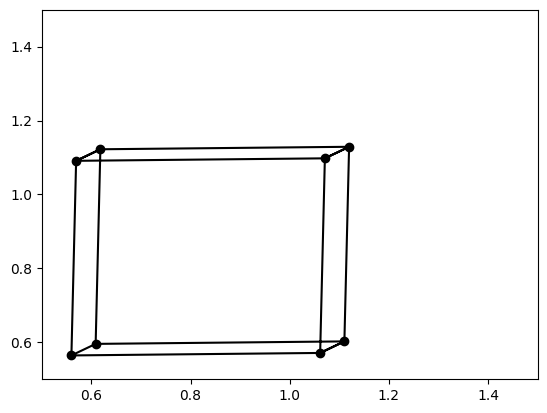

Epoca: 14 error: 0.0012618951908165595


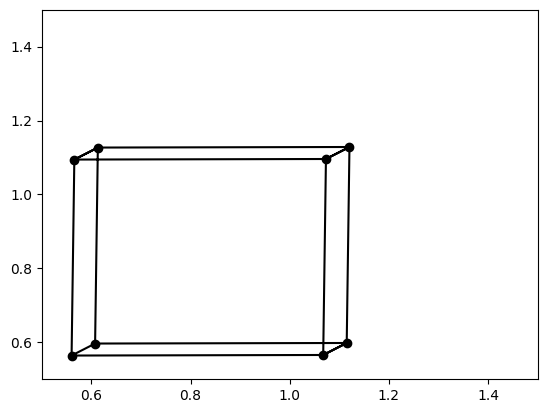

w_final= [[1.0240308782941685, 0.004725081211734872, 0.09231752435671037], [-0.005527336521729209, 1.066381828601984, 0.06708008122708253]]


In [54]:
def entrenamiento(xs, w, y_esp, va=0.1, epocas=1, dibujar=True):
    """ Entrena la capa

    Parameters
    ----------
    xs : lista de vectores de entradas. Lista de listas de flotantes.
    w : pesos de la red. Lista de lista de flotantes.
    ys : lista de vectores de salida esperados. Lista de listas de flotantes.
    epocas : número de veces que repite el entrenamiento. Entero
    """
    w1=w#copy.deepcopy(w)
    for k in range(epocas):
        y_calc=calcula_salidas(cubo,w1)
        print('Epoca:',k,'error:',calcula_error(y_calc,sombra))

        if dibujar==True:
            dibuja(y_calc)

        for i in range(len(xs)):
            x=xs[i]
            ye=y_esp[i]
            yc= calcula_salida(cubo[i],w1)
            w1=backprop_lin(x,w1,ye,yc,va)
    return w1

w=[[w11, w12, w13], [w21, w22, w23]]

w_final=entrenamiento(cubo,w,sombra,0.5,15)

print('w_final=',w_final)

En este caso, luego de 15 épocas los datos calculados se parecen a las coordenadas de la sombra que se muestra a continuación.

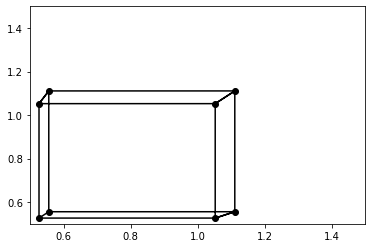

In [ ]:
dibuja(sombra)

#### Ejercicio #5
Dibuje la sombra generada por los siguientes valores

In [55]:
sombra2=[[0.8125, 0.8125], #d=1.3
         [2.1666, 2.1666],
         [0.8125, 1.6250],
         [2.1666, 4.3330],
         [1.6250, 0.8125],
         [4.3333, 2.1666],
         [1.6250, 1.6250],
         [4.3333, 4.3333]]

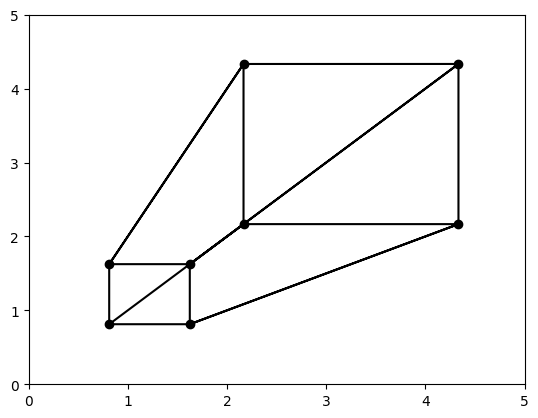

In [56]:
# Respuesta #5
dibuja(sombra2,0,5,0,5)

#### Ejercicio #6
Utilice los anteriores valores de `sombra2` para entrenar nuevamente la red con la rutina `entrenamiento`

Epoca: 0 error: 0.18396797750000005


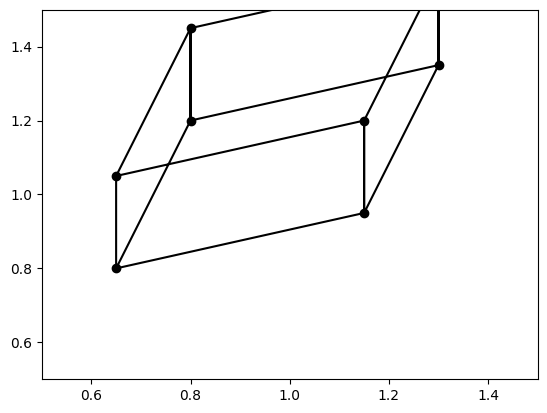

Epoca: 1 error: 11.24898922714329


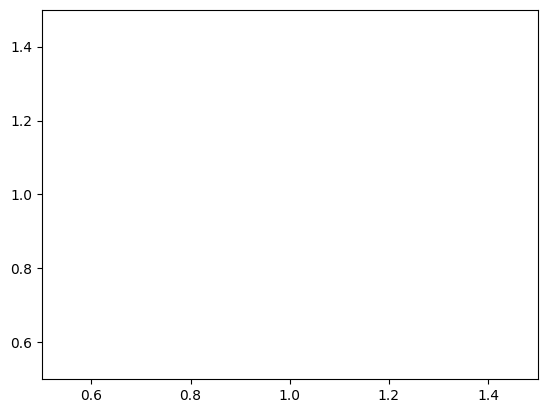

Epoca: 2 error: 10.58563540045853


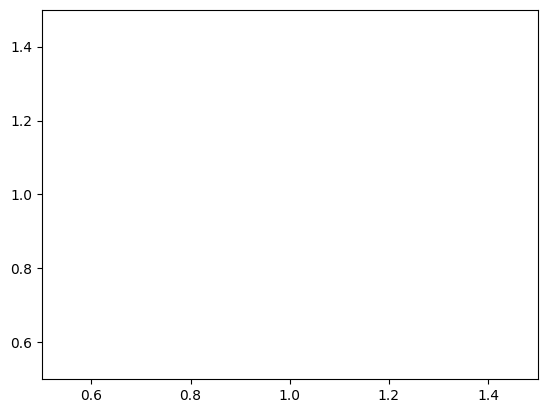

Epoca: 3 error: 10.185368462559715


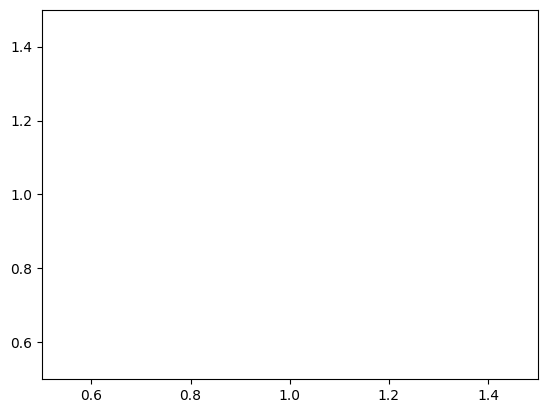

Epoca: 4 error: 9.941707449066977


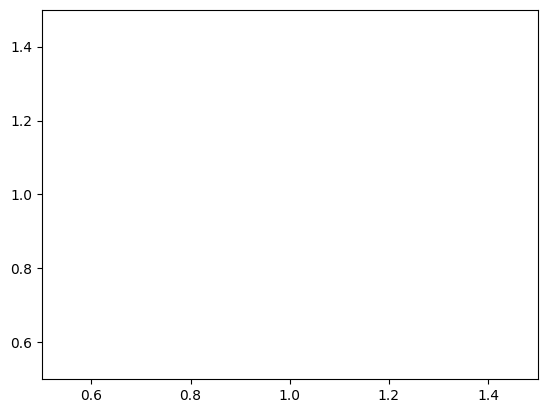

Epoca: 5 error: 9.793093796532144


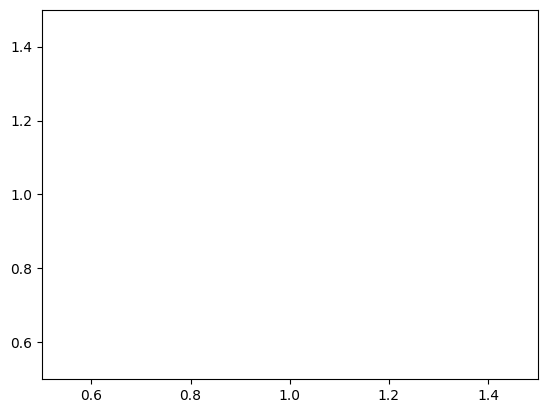

Epoca: 6 error: 9.703035495326617


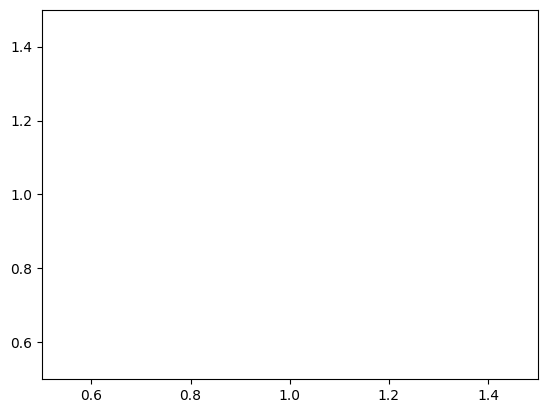

Epoca: 7 error: 9.649369649640343


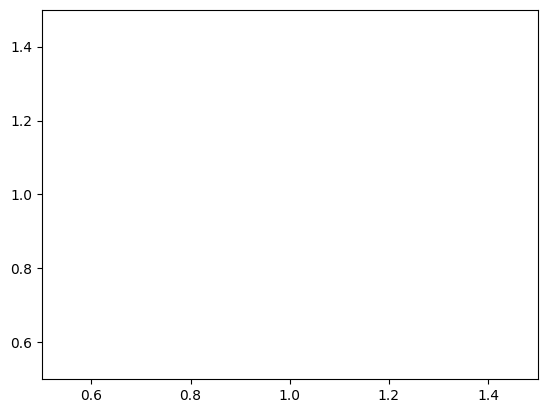

Epoca: 8 error: 9.618379174724957


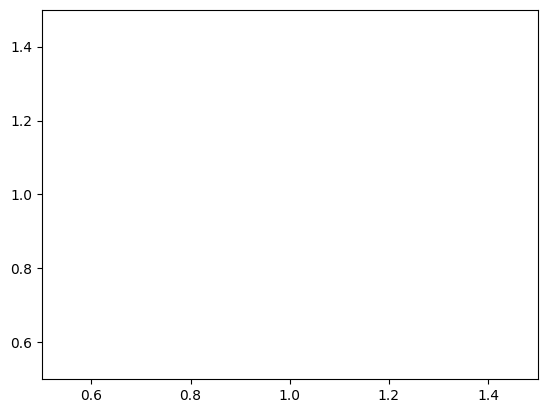

Epoca: 9 error: 9.601460878679152


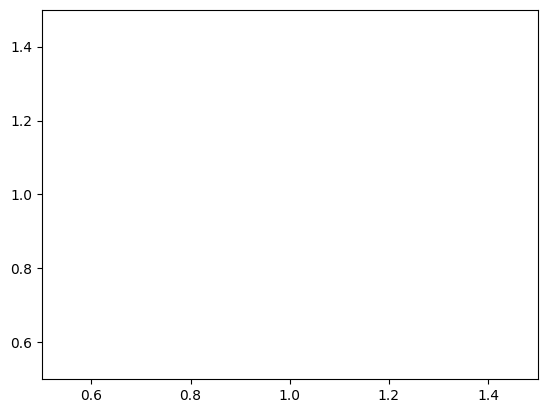

Epoca: 10 error: 9.593176856343693


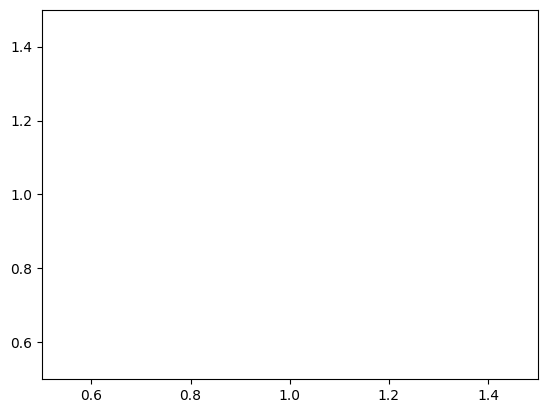

Epoca: 11 error: 9.590081235494388


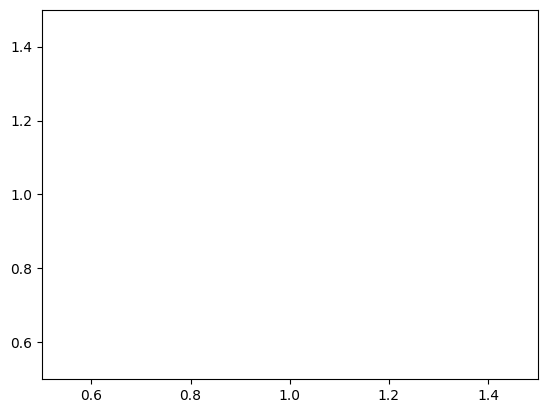

Epoca: 12 error: 9.589996179028091


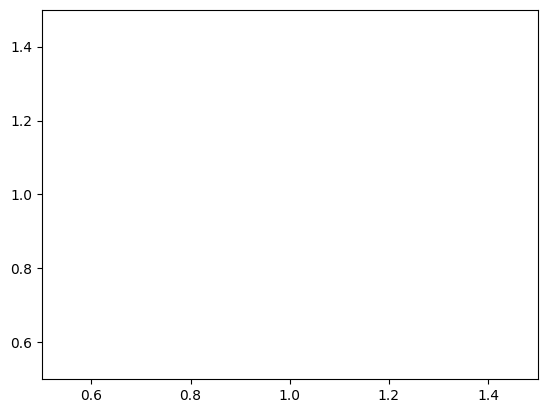

Epoca: 13 error: 9.59155636107664


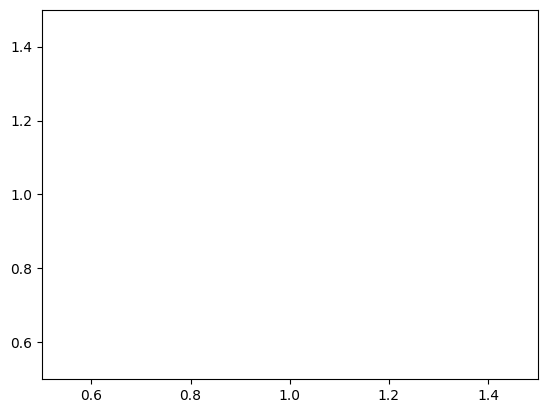

Epoca: 14 error: 9.593918245545822


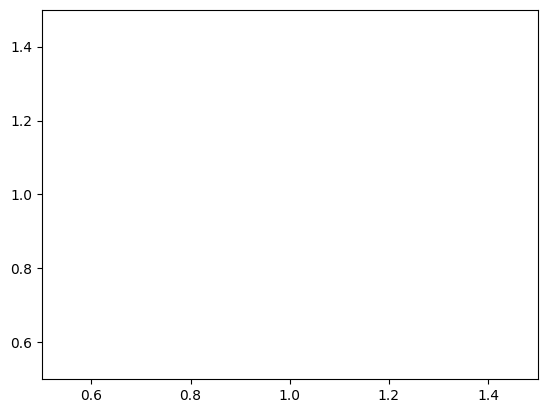

In [57]:
w_final=entrenamiento(cubo,w,sombra2,0.5,15)


#### Ejercicio #7
Compare el error de la primera sombra con respecto a la segunda ¿Cuál es menor? ¿Por qué razón?

In [58]:
# Respuesta #7
comparacion_1=' ... porque ...'

## Fórmula exacta de la sombra

Utilizando la semejanza de los triángulos podemos obtener la fórmula de la sombra.

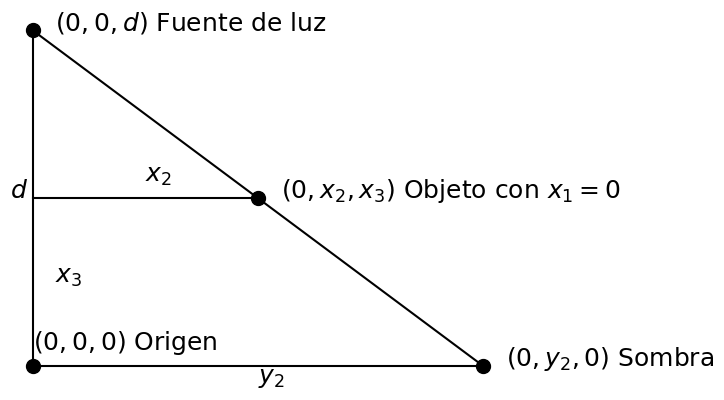

In [59]:
# Ignorar este código
# Este código se usa para dibujar la equivalencia de tirángulos
import matplotlib.pyplot as plt#.plot
fig,ax=plt.subplots()

puntos=[[0,1,2,0],  # x1 x2 x3 x4
        [2,1,0,0]]  # y1 y2 y3 y4
ax.scatter(*puntos,s=100,color='k')

lineas=[(0,0),(0,2),'k', #(x1,x4),(y1,y4),color
        (0,2),(0,0),'k', #(x2,x4),(y2,y4),color
        (0,2),(2,0),'k', #(x2,x4),(y3,y4),color
        (0,1),(1,1),'k', #(x2,x4),(y3,y4),color
       ]
ax.plot(*lineas)

ax.text(0.1, 2, r'$(0,0,d)$ Fuente de luz',{'fontsize': 18})
ax.text(1.1, 1, r'$(0,x_2,x_3)$ Objeto con $x_1=0$',{'fontsize': 18})
ax.text(2.1, 0, r'$(0,y_2,0)$ Sombra',{'fontsize': 18})
ax.text(0, 0.1, r'$(0,0,0)$ Origen',{'fontsize': 18})
ax.text(1, -0.1, r'$y_2$',{'fontsize': 18})
ax.text(-0.1, 1, r'$d$',{'fontsize': 18})
ax.text(0.5, 1.1, r'$x_2$',{'fontsize': 18})
ax.text(0.1, 0.5, r'$x_3$',{'fontsize': 18})

ax.axis('off')
plt.show()

$\frac{y_2}{d}=\frac{x_2}{d-x_3} \Rightarrow y_2= \frac{x_2 d}{d-x_3}$

De manera análoga se obtiene

$\frac{y_1}{d}=\frac{x_1}{d-x_3} \Rightarrow y_1= \frac{x_1 d}{d-x_3}$


#### Ejercicio #8

Argumente el ejercicio #7 desde la perspectiva de la anterior fórmula.

In [60]:
# Respuesta #8
comparacion_2=' ... porque ...'

#### Ejercicio (opcional, no entregar)
* Con alfileres o clips arme un cubo
* Con una lampara proyecte una sombra y tómele una foto
* Determine las coordenadas del cubo y de la sombra
* Entrene con esos datos la red neuronal
* Calcule el error
* Repita el ejercicio varias veces a diferentes distancias de la lámpara y determine a que distancias se aproxima mejor
